### This dataset contains nutritonal data on 80 cereals. 
This is the link for the data:
https://www.kaggle.com/datasets/crawford/80-cereals?resource=download

The mfr(Manufacturer of cereal) field contains the following abbreviation:
mfr: Manufacturer of cereal
A = American Home Food Products;
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina

In [169]:
import calmap
import pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

In [158]:
cereal_df = pd.read_csv('/Users/kanchanas/Desktop/cereal.csv')

In [159]:
cereal_df.set_index('name',inplace = True)

### Exploratory Data Analysis

In [160]:
cereal_df.head(5)

mfr type  calories  protein  fat  sodium  fiber  \
name                                                                        
100% Bran                   N    C        70        4    1     130   10.0   
100% Natural Bran           Q    C       120        3    5      15    2.0   
All-Bran                    K    C        70        4    1     260    9.0   
All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
Almond Delight              R    C       110        2    2     200    1.0   

                           carbo  sugars  potass  vitamins  shelf  weight  \
name                                                                        
100% Bran                    5.0       6     280        25      3     1.0   
100% Natural Bran            8.0       8     135         0      3     1.0   
All-Bran                     7.0       5     320        25      3     1.0   
All-Bran with Extra Fiber    8.0       0     330        25      3     1.0   
Almond Delight              14.0       8      -1        25      3     1.0   

                           cups     rating  
name                                        
100% Bran                  0.33  68.402973  
100% Natural Bran          1.00  33.983679  
All-Bran                   0.33  59.425505  
All-Bran with Extra Fiber  0.50  93.704912  
Almond Delight             0.75  34.384843

In [161]:
cereal_df.tail(5)

mfr type  calories  protein  fat  sodium  fiber  carbo  \
name                                                                         
Triples               G    C       110        2    1     250    0.0   21.0   
Trix                  G    C       110        1    1     140    0.0   13.0   
Wheat Chex            R    C       100        3    1     230    3.0   17.0   
Wheaties              G    C       100        3    1     200    3.0   17.0   
Wheaties Honey Gold   G    C       110        2    1     200    1.0   16.0   

                     sugars  potass  vitamins  shelf  weight  cups     rating  
name                                                                           
Triples                   3      60        25      3     1.0  0.75  39.106174  
Trix                     12      25        25      2     1.0  1.00  27.753301  
Wheat Chex                3     115        25      1     1.0  0.67  49.787445  
Wheaties                  3     110        25      1     1.0  1.00  51.592193  
Wheaties Honey Gold       8      60        25      1     1.0  0.75  36.187559

In [133]:
cereal_df = cereal_df.replace(['A', 'G', 'K', 'N', 'P', 'Q', 'R', 'H', 'C'], 
           ['AHFP', 'GM', 'Kelloggs', 'Nabisco', 'Post', 'Quaker', 'Ralston', 'Hot', 'Cold'])

In [134]:
cereal_df.head(3)

name       mfr  type  calories  protein  fat  sodium  fiber  \
0          100% Bran   Nabisco  Cold        70        4    1     130   10.0   
1  100% Natural Bran    Quaker  Cold       120        3    5      15    2.0   
2           All-Bran  Kelloggs  Cold        70        4    1     260    9.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505

In [135]:
cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [136]:
cereal_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [137]:
cereal_df.info

<bound method DataFrame.info of                          name       mfr  type  calories  protein  fat  sodium  \
0                   100% Bran   Nabisco  Cold        70        4    1     130   
1           100% Natural Bran    Quaker  Cold       120        3    5      15   
2                    All-Bran  Kelloggs  Cold        70        4    1     260   
3   All-Bran with Extra Fiber  Kelloggs  Cold        50        4    0     140   
4              Almond Delight   Ralston  Cold       110        2    2     200   
..                        ...       ...   ...       ...      ...  ...     ...   
72                    Triples        GM  Cold       110        2    1     250   
73                       Trix        GM  Cold       110        1    1     140   
74                 Wheat Chex   Ralston  Cold       100        3    1     230   
75                   Wheaties        GM  Cold       100        3    1     200   
76        Wheaties Honey Gold        GM  Cold       110        2    1     200

In [138]:
cereal_df.describe

<bound method NDFrame.describe of                          name       mfr  type  calories  protein  fat  sodium  \
0                   100% Bran   Nabisco  Cold        70        4    1     130   
1           100% Natural Bran    Quaker  Cold       120        3    5      15   
2                    All-Bran  Kelloggs  Cold        70        4    1     260   
3   All-Bran with Extra Fiber  Kelloggs  Cold        50        4    0     140   
4              Almond Delight   Ralston  Cold       110        2    2     200   
..                        ...       ...   ...       ...      ...  ...     ...   
72                    Triples        GM  Cold       110        2    1     250   
73                       Trix        GM  Cold       110        1    1     140   
74                 Wheat Chex   Ralston  Cold       100        3    1     230   
75                   Wheaties        GM  Cold       100        3    1     200   
76        Wheaties Honey Gold        GM  Cold       110        2    1     2

In [139]:
#Check for missing values
cereal_df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [140]:
cereal_df.set_index('name')

mfr  type  calories  protein  fat  sodium  \
name                                                                        
100% Bran                   Nabisco  Cold        70        4    1     130   
100% Natural Bran            Quaker  Cold       120        3    5      15   
All-Bran                   Kelloggs  Cold        70        4    1     260   
All-Bran with Extra Fiber  Kelloggs  Cold        50        4    0     140   
Almond Delight              Ralston  Cold       110        2    2     200   
...                             ...   ...       ...      ...  ...     ...   
Triples                          GM  Cold       110        2    1     250   
Trix                             GM  Cold       110        1    1     140   
Wheat Chex                  Ralston  Cold       100        3    1     230   
Wheaties                         GM  Cold       100        3    1     200   
Wheaties Honey Gold              GM  Cold       110        2    1     200   

                           fiber  carbo  sugars  potass  vitamins  shelf  \
name                                                                       
100% Bran                   10.0    5.0       6     280        25      3   
100% Natural Bran            2.0    8.0       8     135         0      3   
All-Bran                     9.0    7.0       5     320        25      3   
All-Bran with Extra Fiber   14.0    8.0       0     330        25      3   
Almond Delight               1.0   14.0       8      -1        25      3   
...                          ...    ...     ...     ...       ...    ...   
Triples                      0.0   21.0       3      60        25      3   
Trix                         0.0   13.0      12      25        25      2   
Wheat Chex                   3.0   17.0       3     115        25      1   
Wheaties                     3.0   17.0       3     110        25      1   
Wheaties Honey Gold          1.0   16.0       8      60        25      1   

                           weight  cups     rating  
name                                                
100% Bran                     1.0  0.33  68.402973  
100% Natural Bran             1.0  1.00  33.983679  
All-Bran                      1.0  0.33  59.425505  
All-Bran with Extra Fiber     1.0  0.50  93.704912  
Almond Delight                1.0  0.75  34.384843  
...                           ...   ...        ...  
Triples                       1.0  0.75  39.106174  
Trix                          1.0  1.00  27.753301  
Wheat Chex                    1.0  0.67  49.787445  
Wheaties                      1.0  1.00  51.592193  
Wheaties Honey Gold           1.0  0.75  36.187559  

[77 rows x 15 columns]

In [141]:
cereal_df[['name','calories','rating']].sort_values('rating',ascending=False).head(10)

name  calories     rating
3   All-Bran with Extra Fiber        50  93.704912
64     Shredded Wheat 'n'Bran        90  74.472949
65  Shredded Wheat spoon size        90  72.801787
0                   100% Bran        70  68.402973
63             Shredded Wheat        80  68.235885
20     Cream of Wheat (Quick)       100  64.533816
55               Puffed Wheat        50  63.005645
54                Puffed Rice        50  60.756112
50          Nutri-grain Wheat        90  59.642837
2                    All-Bran        70  59.425505

*The cereal which is has the highest rating as per the dataset is 'All-Bran with Extra Fibre'. It does seem as though about 4 out of the top 10 cereals have Bran as a cereal grain as per their names.

In [142]:
cereal_df[['name','calories','rating']].sort_values('calories',ascending=False).head(10)

name  calories     rating
46               Mueslix Crispy Blend       160  30.313351
44   Muesli Raisins; Dates; & Almonds       150  37.136863
45  Muesli Raisins; Peaches; & Pecans       150  34.139765
70                  Total Raisin Bran       140  28.592785
39             Just Right Fruit & Nut       140  36.471512
49          Nutri-Grain Almond-Raisin       140  40.692320
51               Oatmeal Raisin Crisp       130  30.450843
7                             Basic 4       130  37.038562
52              Post Nat. Raisin Bran       120  37.840594
35                   Honey Graham Ohs       120  21.871292

*The cereal with the highest calories looks to be Meslix Crispy Brand with a calorie count of 160 per serving.

In [143]:
cereal_df['shelf'].value_counts()

3    36
2    21
1    20
Name: shelf, dtype: int64

In [144]:
cereal_df.set_index('name',inplace = True)

<AxesSubplot:xlabel='name'>

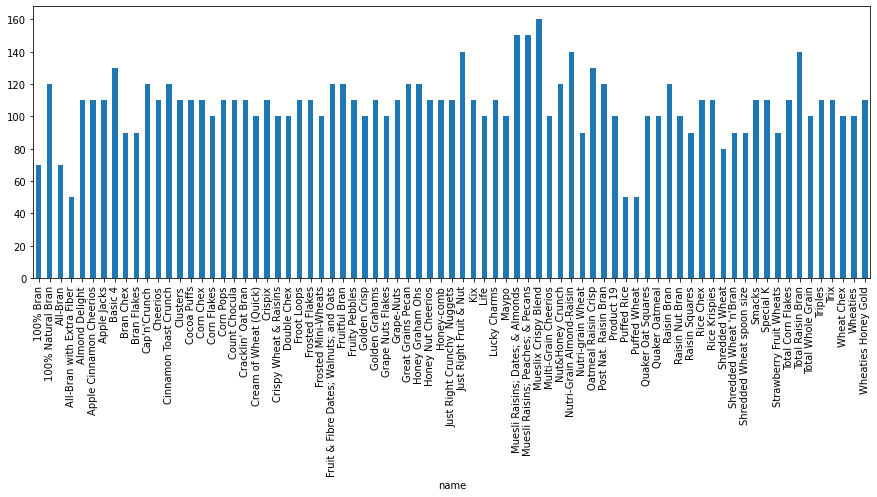

In [145]:
cereal_df.calories.plot(kind='bar',figsize = (15,5))

*Meuslix Crispy Brand has the highest calorie count among all the cereals.

/Users/kanchanas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='type'>

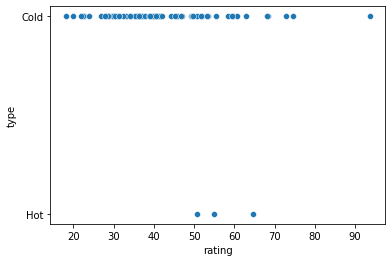

In [146]:
sns.scatterplot(cereal_df['rating'],cereal_df['type'])  

*There are more cereals of the cold type as compared to the hot type and as such, there are more cold cereal types with ratings.

/Users/kanchanas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='shelf'>

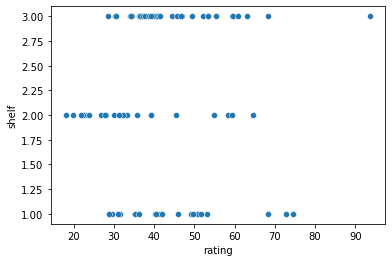

In [147]:
sns.scatterplot(cereal_df['rating'],cereal_df['shelf'])  

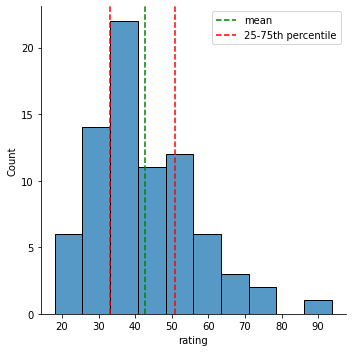

In [148]:
sns.displot(cereal_df['rating'])
plt.axvline(x=np.mean(cereal_df['rating']),c='green',ls='--',label='mean')
plt.axvline(x=np.percentile(cereal_df['rating'],25),c='red',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(cereal_df['rating'],75),c='red',ls='--')
plt.legend()

array([[<AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'protein'}>,
        <AxesSubplot:title={'center':'fat'}>,
        <AxesSubplot:title={'center':'sodium'}>],
       [<AxesSubplot:title={'center':'fiber'}>,
        <AxesSubplot:title={'center':'carbo'}>,
        <AxesSubplot:title={'center':'sugars'}>,
        <AxesSubplot:title={'center':'potass'}>],
       [<AxesSubplot:title={'center':'vitamins'}>,
        <AxesSubplot:title={'center':'shelf'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'cups'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

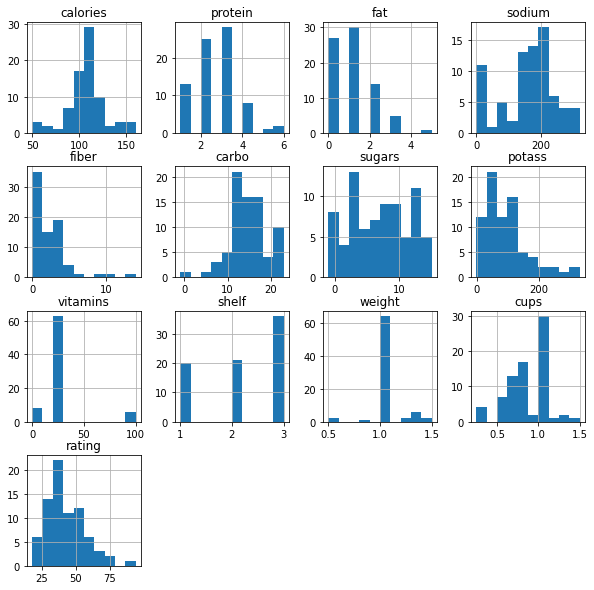

In [149]:
cereal_df.hist(figsize=(10,10))

<AxesSubplot:ylabel='Frequency'>

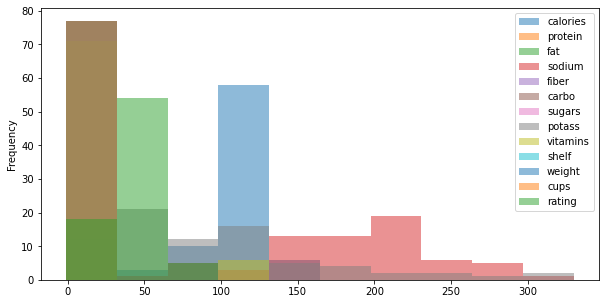

In [150]:
cereal_df.plot.hist(alpha = 0.5,figsize = (10,5))

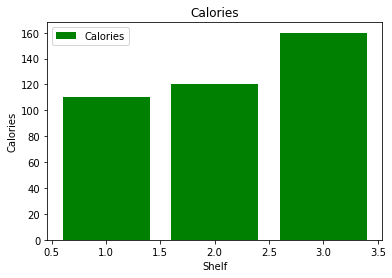

In [151]:
x = cereal_df['shelf']
y = cereal_df['calories']
plt.bar(x,y,label='Calories',color='green')
plt.xlabel("Shelf")
plt.ylabel("Calories")
plt.title("Calories")
plt.legend()
plt.show()

*Shelf 3 looks to have the highest caloric count and this in turn might indicate that it stores cereals with the most calories per serving or it holds the most number of cereal brands.

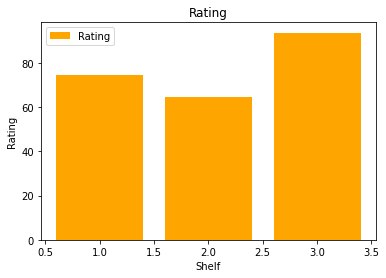

In [152]:
x = cereal_df['shelf']
y = cereal_df['rating']
plt.bar(x,y,label='Rating',color='orange')
plt.xlabel("Shelf")
plt.ylabel("Rating")
plt.title("Rating")
plt.legend()
plt.show()

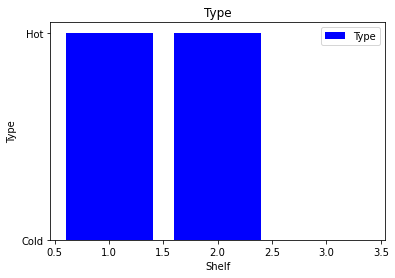

In [153]:
x = cereal_df['shelf']
y = cereal_df['type']
plt.bar(x,y,label='Type',color='blue')
plt.xlabel("Shelf")
plt.ylabel("Type")
plt.title("Type")
plt.legend()
plt.show()

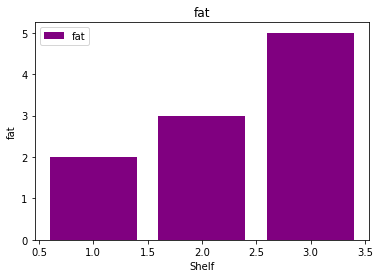

In [154]:
x = cereal_df['shelf']
y = cereal_df['fat']
plt.bar(x,y,label='fat',color='purple')
plt.xlabel("Shelf")
plt.ylabel("fat")
plt.title("fat")
plt.legend()
plt.show()

<AxesSubplot:xlabel='shelf', ylabel='rating'>

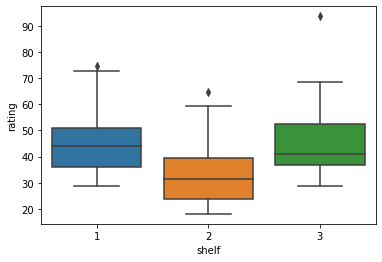

In [155]:
#To find out if there is a relationship between shelf and rating
sns.boxplot(x=cereal_df['shelf'],y=cereal_df['rating'])

<AxesSubplot:xlabel='type', ylabel='rating'>

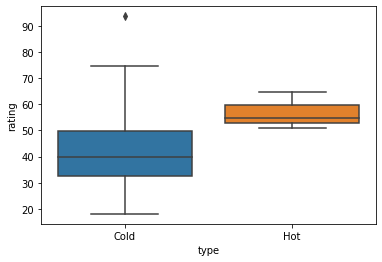

In [156]:
#To find out if there is a relationship between type and rating
sns.boxplot(x=cereal_df['type'],y=cereal_df['rating'])

### Correlation Analysis

<AxesSubplot:>

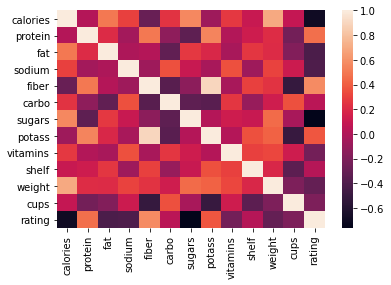

In [171]:
sns.heatmap(np.round(cereal_df.corr(),2))

In [172]:
np.round(cereal_df.corr(),2)

calories  protein   fat  sodium  fiber  carbo  sugars  potass  \
calories      1.00     0.02  0.50    0.30  -0.29   0.25    0.56   -0.07   
protein       0.02     1.00  0.21   -0.05   0.50  -0.13   -0.33    0.55   
fat           0.50     0.21  1.00   -0.01   0.02  -0.32    0.27    0.19   
sodium        0.30    -0.05 -0.01    1.00  -0.07   0.36    0.10   -0.03   
fiber        -0.29     0.50  0.02   -0.07   1.00  -0.36   -0.14    0.90   
carbo         0.25    -0.13 -0.32    0.36  -0.36   1.00   -0.33   -0.35   
sugars        0.56    -0.33  0.27    0.10  -0.14  -0.33    1.00    0.02   
potass       -0.07     0.55  0.19   -0.03   0.90  -0.35    0.02    1.00   
vitamins      0.27     0.01 -0.03    0.36  -0.03   0.26    0.13    0.02   
shelf         0.10     0.13  0.26   -0.07   0.30  -0.10    0.10    0.36   
weight        0.70     0.22  0.21    0.31   0.25   0.14    0.45    0.42   
cups          0.09    -0.24 -0.18    0.12  -0.51   0.36   -0.03   -0.50   
rating       -0.69     0.47 -0.41   -0.40   0.58   0.05   -0.76    0.38   

          vitamins  shelf  weight  cups  rating  
calories      0.27   0.10    0.70  0.09   -0.69  
protein       0.01   0.13    0.22 -0.24    0.47  
fat          -0.03   0.26    0.21 -0.18   -0.41  
sodium        0.36  -0.07    0.31  0.12   -0.40  
fiber        -0.03   0.30    0.25 -0.51    0.58  
carbo         0.26  -0.10    0.14  0.36    0.05  
sugars        0.13   0.10    0.45 -0.03   -0.76  
potass        0.02   0.36    0.42 -0.50    0.38  
vitamins      1.00   0.30    0.32  0.13   -0.24  
shelf         0.30   1.00    0.19 -0.34    0.03  
weight        0.32   0.19    1.00 -0.20   -0.30  
cups          0.13  -0.34   -0.20  1.00   -0.20  
rating       -0.24   0.03   -0.30 -0.20    1.00

*There does seem to be a relatively strong negative correlation between rating and sugars (-0.76). Also, there is also a relatively strong negative correlation between calories and rating (-0.69).

In [170]:
cereal_df2 = pd.read_csv('/Users/kanchanas/Desktop/cereal.csv')
Prof = ProfileReport(cereal_df2)
Prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]